In [58]:
import torch
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [31]:
train_set = tv.datasets.FashionMNIST(
    root  ="./data/FashionMNIST",
    train = True,
    download = True,
    transform = tv.transforms.Compose([tv.transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [35]:
len(train_set)

60000

In [42]:
image, label = train_set[10]

In [47]:
batch = iter(train_loader)

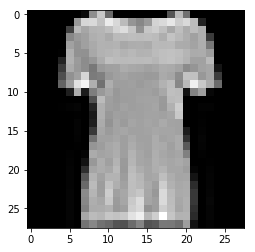

In [46]:
plt.imshow(image.squeeze(), cmap = "gray")

In [55]:
images, labels = next(batch)
labels

tensor([3, 1, 6, 3, 1, 4, 4, 6, 1, 9])

In [73]:
 class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
    
    def forward(self, t):
        t = t
        
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride =2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.fc2(t)
        t = F.relu(t)
        
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [74]:
a = Network()

In [75]:
a

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)